In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Introducción a Python

### 1.1 Tipos de Datos en Python

<small>
    
- **Entero (`int`)**:
  Representa números enteros, positivos o negativos, sin decimales.
  *Ejemplo*: `42`, `-3`
- **Número de punto flotante (`float`)**:
  Representa números reales, positivos o negativos, con decimales.
  *Ejemplo*: `3.14`, `-0.001`

- **Cadena de caracteres (`str`)**:
  Representa texto, encerrado en comillas simples, dobles o triples.
  *Ejemplo*: `"hola"`, `'mundo'`, `"""texto en varias líneas"""`

- **Booleano (`bool`)**:
  Representa uno de dos valores: `True` (verdadero) o `False` (falso).
  *Ejemplo*: `True`, `False`

- **Lista (`list`)**:
  Una colección ordenada y mutable de elementos, que pueden ser de diferentes tipos de datos.
  *Ejemplo*: `[1, 2, 3]`, `['manzana', 'banana', 'cereza']`

- **Tupla (`tuple`)**:
  Una colección ordenada e inmutable de elementos, que pueden ser de diferentes tipos de datos.
  *Ejemplo*: `(1, 2, 3)`, `('manzana', 'banana', 'cereza')`

- **Diccionario (`dict`)**:
  Una colección no ordenada y mutable de pares clave-valor.
  *Ejemplo*: `{'nombre': 'Alicia', 'edad': 25}`, `{'manzana': 1, 'banana': 2}`

- **Conjunto (`set`)**:
  Una colección no ordenada de elementos únicos.
  *Ejemplo*: `{1, 2, 3}`, `{'manzana', 'banana', 'cereza'}`

- **Tipo nulo (`NoneType`)**:
  Representa la ausencia de un valor o un valor nulo.
  *Ejemplo*: `None, NaN, NaT`
  
- **Object (`Object`)**:
  Representa un tipo de data donde hay texto incluido.
  *Ejemplo*: `'SKU-1'`

### 1.2 Cargar datos

Los comandos más utilizados son `pd.read_csv()` y `pd.read_excel()`. Para algunos archivos que contienen caracteres
especiales como ñ, tildes u otros del idioma español, se adiciona `encoding='utf-8'` o tambien `encoding='latin1'`

En archivos de Excel se debe traer cada hoja por aparte, con el comando `sheet_name = 'Hoja 1'`
Si se desan columnas especficas se puede usar `usecols = 'A:G'`

<small>
<pre>
\
│
├── dataset\
│   ├── demanda_dia.csv
│   └── sku_costos_utilidad.xlsx
│
└── planeacion_demanda.ipynb
</pre>



In [3]:
ruta_demanda = r'dataset\demanda_dia.csv'
df = pd.read_csv(ruta_demanda, encoding='utf-8')  

In [4]:
df

,FECHA,COD_ALMACEN,COD_SKU,DESC_SKU,DEMANDA
0,13-01-18,W113,PT-001,SKU_1,25
1,13-01-18,W113,PT-002,SKU_2,6
2,13-01-18,W113,PT-003,SKU_3,26
3,13-01-18,W113,PT-004,SKU_4,1
4,13-01-18,W113,PT-005,SKU_5,11
...,...,...,...,...,...
115343,24-12-23,W113,PT-150,SKU_150,8
115344,24-12-23,W113,PT-218,SKU_218,2
115345,24-12-23,W113,PT-096,SKU_96,1
115346,14-12-23,W113,PT-045,SKU_45,1


### 1.3 Comandos Básicos para Exploración de Data Frames

Los comandos más útiles a la hora de revisar y explorar la información son:
* `.head()`, `.tail()`, `.info()`, `.describe()`
* `.shape`, `.columns`, `.dtypes`, `unique()` 

<font color='navy'><b> Ejercicio 1: Explorar df con las funciones indicadas

### 1.4 Indices en Pandas [Index]

<small>

Un índice en pandas es una etiqueta que se utiliza para identificar las filas de un DataFrame o una Serie. 
Cada fila tiene una etiqueta de índice, que puede ser un número entero, una cadena, una fecha u otro tipo de dato.

**Tipos de Índices:**

- Indice estándar: Un rango de enteros desde 0 hasta N-1, donde N es el número de filas.
- Indice basado en etiquetas: Puede ser cualquier tipo de dato (cadenas, números, etc.) que proporcione etiquetas únicas para las filas.
- Multiíndice (MultiIndex): Permite tener múltiples niveles de índices para etiquetar las filas en una estructura jerárquica.

**DatetimeIndex** es un tipo especial de índice en pandas utilizado para trabajar con datos temporales. 
Este índice se compone de objetos datetime y permite realizar operaciones y análisis específicos de series
temporales, como resampling, rolling windows y alineación temporal.

*Ventajas:*

- Facilita la manipulación de datos temporales.
- Permite acceder a datos por año, mes, día, etc.
- Facilita el análisis de series temporales, como la interpolación, suavización y la descomposición.

## 2. Pre-procesamiento de datos

### 2.1 Formato Fecha [datetime index]

In [5]:
# Asignar formato datetime a columna Fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d-%m-%y')
df

,FECHA,COD_ALMACEN,COD_SKU,DESC_SKU,DEMANDA
0,2018-01-13,W113,PT-001,SKU_1,25
1,2018-01-13,W113,PT-002,SKU_2,6
2,2018-01-13,W113,PT-003,SKU_3,26
3,2018-01-13,W113,PT-004,SKU_4,1
4,2018-01-13,W113,PT-005,SKU_5,11
...,...,...,...,...,...
115343,2023-12-24,W113,PT-150,SKU_150,8
115344,2023-12-24,W113,PT-218,SKU_218,2
115345,2023-12-24,W113,PT-096,SKU_96,1
115346,2023-12-14,W113,PT-045,SKU_45,1


In [6]:
# Establecer FECHA como datetime index
df.set_index('FECHA', inplace=True)
df

,COD_ALMACEN,COD_SKU,DESC_SKU,DEMANDA
FECHA,,,,
2018-01-13,W113,PT-001,SKU_1,25
2018-01-13,W113,PT-002,SKU_2,6
2018-01-13,W113,PT-003,SKU_3,26
2018-01-13,W113,PT-004,SKU_4,1
2018-01-13,W113,PT-005,SKU_5,11
...,...,...,...,...
2023-12-24,W113,PT-150,SKU_150,8
2023-12-24,W113,PT-218,SKU_218,2
2023-12-24,W113,PT-096,SKU_96,1


In [7]:
# Eliminar columna COD_ALMACEN
df = df.drop(columns = 'COD_ALMACEN')
df

,COD_SKU,DESC_SKU,DEMANDA
FECHA,,,
2018-01-13,PT-001,SKU_1,25
2018-01-13,PT-002,SKU_2,6
2018-01-13,PT-003,SKU_3,26
2018-01-13,PT-004,SKU_4,1
2018-01-13,PT-005,SKU_5,11
...,...,...,...
2023-12-24,PT-150,SKU_150,8
2023-12-24,PT-218,SKU_218,2
2023-12-24,PT-096,SKU_96,1


In [8]:
# Filtrar por fechas posteriores a 2021-01-01
df = df[df.index >= '2021-01-01'].copy()
df

,COD_SKU,DESC_SKU,DEMANDA
FECHA,,,
2021-01-31,PT-011,SKU_11,5
2021-01-31,PT-016,SKU_16,33
2021-01-31,PT-026,SKU_26,15
2021-01-31,PT-015,SKU_15,14
2021-01-31,PT-137,SKU_137,3
...,...,...,...
2023-12-24,PT-150,SKU_150,8
2023-12-24,PT-218,SKU_218,2
2023-12-24,PT-096,SKU_96,1


### 2.2 Agrupar demanda por semana

Otras opciones de agrupación: 'W-TUE, '2W-SUN', 'ME', '3ME,, 'C', 'B', 'YE'

In [9]:
# Usar función GROUP BY para agrupar demanda por semana, comenzando los lunes y terminando los domingos

df_sem = df.groupby(['COD_SKU', 'DESC_SKU']).resample('W-SUN').sum(numeric_only=True)
df_sem

DEMANDA
COD_SKU DESC_SKU FECHA              
PT-001  SKU_1    2021-01-03       37
                 2021-01-10       89
                 2021-01-17      103
                 2021-01-24      100
                 2021-01-31       97
...                              ...
PT-227  SKU_227  2023-12-31       55
PT-228  SKU_228  2023-12-17       29
                 2023-12-24       41
                 2023-12-31       27
PT-229  SKU_229  2023-12-31        1

[18469 rows x 1 columns]

In [10]:
# Resetear Index para aplanar la tabla
df_sem = df_sem.reset_index()
df_sem

,COD_SKU,DESC_SKU,FECHA,DEMANDA
0,PT-001,SKU_1,2021-01-03,37
1,PT-001,SKU_1,2021-01-10,89
2,PT-001,SKU_1,2021-01-17,103
3,PT-001,SKU_1,2021-01-24,100
4,PT-001,SKU_1,2021-01-31,97
...,...,...,...,...
18464,PT-227,SKU_227,2023-12-31,55
18465,PT-228,SKU_228,2023-12-17,29
18466,PT-228,SKU_228,2023-12-24,41
18467,PT-228,SKU_228,2023-12-31,27


In [11]:
# Colocar semanas como columnas con una tabla dinamica
df_sem_td = df_sem.pivot(index=['COD_SKU', 'DESC_SKU'], columns='FECHA', values='DEMANDA').fillna(0)
df_sem_td

,FECHA,2021-01-03,2021-01-10,2021-01-17,2021-01-24,2021-01-31,2021-02-07,2021-02-14,2021-02-21,2021-02-28,2021-03-07,...,2023-10-29,2023-11-05,2023-11-12,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31
COD_SKU,DESC_SKU,,,,,,,,,,,,,,,,,,,,,
PT-001,SKU_1,37.0,89.0,103.0,100.0,97.0,97.0,106.0,95.0,110.0,87.0,...,151.0,130.0,148.0,152.0,170.0,185.0,153.0,180.0,152.0,110.0
PT-002,SKU_2,3.0,5.0,7.0,9.0,8.0,7.0,11.0,8.0,2.0,9.0,...,10.0,3.0,7.0,15.0,7.0,4.0,6.0,11.0,6.0,1.0
PT-003,SKU_3,51.0,70.0,133.0,94.0,109.0,93.0,97.0,86.0,92.0,93.0,...,97.0,84.0,109.0,106.0,96.0,114.0,104.0,120.0,87.0,66.0
PT-004,SKU_4,0.0,3.0,2.0,5.0,1.0,2.0,0.0,5.0,0.0,0.0,...,6.0,3.0,3.0,2.0,4.0,9.0,4.0,1.0,2.0,2.0
PT-005,SKU_5,13.0,23.0,27.0,22.0,31.0,32.0,33.0,23.0,33.0,33.0,...,36.0,34.0,40.0,37.0,38.0,43.0,50.0,42.0,40.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-225,SKU_225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,14.0,17.0,24.0,21.0
PT-226,SKU_226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
PT-227,SKU_227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,34.0,59.0,52.0,55.0


### 2.3 Slicing en Pandas

<small>

- Considera una lista de letras:
  
   **letras = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']**
  
**letras[`:`]**:     El `:` en la posición indica que queremos seleccionar todos los elementos de la lista.
                     Por lo tanto, letras[:] devuelve una copia de toda la lista letras. `Resultado: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']`

**letras[`:5`]**:    Indica que queremos seleccionar desde el inicio hasta antes de la posicion 5 *-sin incluirla-*, que es la letra 'e'. `Resultado: ['a', 'b', 'c', 'd', 'e']`

**letras[`3:`]**:    Indica que queremos seleccionar desde la posicion 3 *-incluyendola-*, que es la letra 'd' hasta la posicion final. `Resultado: ['d', 'e', 'f', 'g', 'h', 'i', 'j']`

**letras[`2:8`]**:   Indica que queremos seleccionar desde la posicion 2 *-incluyendola-*, que es la letra 'c' hasta *antes* de la posicion 8 *-sin incluirla-*, que corresponde a la letra 'h'. `Resultado: ['c', 'd', 'e', 'f', 'g', 'h']`

**letras[`-5:`]**:   El -5: en la posición indica que queremos comenzar a seleccionar en la posicion -5, que es contando de atras hacia adelante, que es la letra 'f', hasta el final de la lista. `Resultado ['f', 'g', 'h', 'i', 'j']`, que son los últimos 5 elementos de la lista letras.

**letras[`-6:-2`]**: El -6: en la posición indica que queremos comenzar a seleccionar en la posicion -6 contando de atras hacia adelante, que es la letra 'e', hasta dos elementos antes del final, que es la letra 'h'. `Resultado ['e', 'f', 'g', 'h']`.  

In [12]:
letras = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [13]:
letras[:]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

<small>

El método `iloc` es usado para seleccionar filas y columnas por sus posiciones en la matriz.

En `df_sem_td.iloc[ : ,-2: ]`:
- ` : ` significa que queremos seleccionar las filas desde el inicio hasta el final.
- `-2: ` en las columnas significa que queremos seleccionar las últimas 2 columnas.

<font color='navy'><b> Ejercicio 2: 
- Seleccione de la fila 10 a la 20 y de la columna 5 hasta 3 columnas antes de la ultima de df_sem_td
- Seleccione de la fila 5 a la ultima y de la columna inicial hasta 10 columnas antes de la ultima de df_sem_td
- Seleccione de la fila inicial hasta 20 antes de la ultima y de la columna inicial hasta la ultima de df_sem_td


## 3. Calculo de la demanda del último año

In [14]:
# Selecciona las nombres de columna de las ultimas 52 semanas
demanda_ultimo_año = df_sem_td.columns[-52:].tolist()

In [15]:
# Suma las ultimas 52 semanas (un año) de demanda y crea una columna llamada 'TOTAL DEMANDA'
df_sem_td['TOTAL_DEMANDA'] = df_sem_td[demanda_ultimo_año].sum(axis=1)
df_sem_td

,FECHA,2021-01-03 00:00:00,2021-01-10 00:00:00,2021-01-17 00:00:00,2021-01-24 00:00:00,2021-01-31 00:00:00,2021-02-07 00:00:00,2021-02-14 00:00:00,2021-02-21 00:00:00,2021-02-28 00:00:00,2021-03-07 00:00:00,...,2023-11-05 00:00:00,2023-11-12 00:00:00,2023-11-19 00:00:00,2023-11-26 00:00:00,2023-12-03 00:00:00,2023-12-10 00:00:00,2023-12-17 00:00:00,2023-12-24 00:00:00,2023-12-31 00:00:00,TOTAL_DEMANDA
COD_SKU,DESC_SKU,,,,,,,,,,,,,,,,,,,,,
PT-001,SKU_1,37.0,89.0,103.0,100.0,97.0,97.0,106.0,95.0,110.0,87.0,...,130.0,148.0,152.0,170.0,185.0,153.0,180.0,152.0,110.0,6456.0
PT-002,SKU_2,3.0,5.0,7.0,9.0,8.0,7.0,11.0,8.0,2.0,9.0,...,3.0,7.0,15.0,7.0,4.0,6.0,11.0,6.0,1.0,338.0
PT-003,SKU_3,51.0,70.0,133.0,94.0,109.0,93.0,97.0,86.0,92.0,93.0,...,84.0,109.0,106.0,96.0,114.0,104.0,120.0,87.0,66.0,5016.0
PT-004,SKU_4,0.0,3.0,2.0,5.0,1.0,2.0,0.0,5.0,0.0,0.0,...,3.0,3.0,2.0,4.0,9.0,4.0,1.0,2.0,2.0,67.0
PT-005,SKU_5,13.0,23.0,27.0,22.0,31.0,32.0,33.0,23.0,33.0,33.0,...,34.0,40.0,37.0,38.0,43.0,50.0,42.0,40.0,40.0,1908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-225,SKU_225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,14.0,17.0,24.0,21.0,84.0
PT-226,SKU_226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
PT-227,SKU_227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,34.0,59.0,52.0,55.0,214.0


## 4. Calculo de la Utilidad por SKU del último año

### 4.1 Cargar Información de Utilidades

In [16]:
# Carga la informacion de Costos Unitarios y Utilidad Unitaria
ruta_costos = r'dataset\sku_costos_utilidad.xlsx'
df_skus_costos = pd.read_excel(ruta_costos)
df_skus_costos

,COD_SKU,DESC_SKU,PRECIO,COSTO_UNITARIO,UTILIDAD_UNITARIA,INVENTARIO_ACTUAL
0,PT-001,SKU_1,21000,11550,9450,51
1,PT-002,SKU_2,4000,2480,1520,0
2,PT-003,SKU_3,65000,27300,37700,150
3,PT-004,SKU_4,10000,4000,6000,20
4,PT-005,SKU_5,6000,3540,2460,9
...,...,...,...,...,...,...
224,PT-225,SKU_225,35000,19250,15750,65
225,PT-226,SKU_226,18000,7920,10080,13
226,PT-227,SKU_227,40000,17600,22400,141
227,PT-228,SKU_228,8000,4000,4000,48


In [17]:
# Selecciona las columnas a traer 
columnas_importar = ['COD_SKU', 'DESC_SKU', 'COSTO_UNITARIO','UTILIDAD_UNITARIA', 'PRECIO',	'INVENTARIO_ACTUAL']

# Trae las columnas correspondientes a cada codigo. Es equivalente a un BuscarV/BuscarX
dem_sem = df_sem_td.merge(df_skus_costos[columnas_importar], on=['COD_SKU','DESC_SKU'], how ='left')
dem_sem

# Ojo: El Indice se resetea por defecto


,COD_SKU,DESC_SKU,2021-01-03 00:00:00,2021-01-10 00:00:00,2021-01-17 00:00:00,2021-01-24 00:00:00,2021-01-31 00:00:00,2021-02-07 00:00:00,2021-02-14 00:00:00,2021-02-21 00:00:00,...,2023-12-03 00:00:00,2023-12-10 00:00:00,2023-12-17 00:00:00,2023-12-24 00:00:00,2023-12-31 00:00:00,TOTAL_DEMANDA,COSTO_UNITARIO,UTILIDAD_UNITARIA,PRECIO,INVENTARIO_ACTUAL
0,PT-001,SKU_1,37.0,89.0,103.0,100.0,97.0,97.0,106.0,95.0,...,185.0,153.0,180.0,152.0,110.0,6456.0,11550,9450,21000,51
1,PT-002,SKU_2,3.0,5.0,7.0,9.0,8.0,7.0,11.0,8.0,...,4.0,6.0,11.0,6.0,1.0,338.0,2480,1520,4000,0
2,PT-003,SKU_3,51.0,70.0,133.0,94.0,109.0,93.0,97.0,86.0,...,114.0,104.0,120.0,87.0,66.0,5016.0,27300,37700,65000,150
3,PT-004,SKU_4,0.0,3.0,2.0,5.0,1.0,2.0,0.0,5.0,...,9.0,4.0,1.0,2.0,2.0,67.0,4000,6000,10000,20
4,PT-005,SKU_5,13.0,23.0,27.0,22.0,31.0,32.0,33.0,23.0,...,43.0,50.0,42.0,40.0,40.0,1908.0,3540,2460,6000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,PT-225,SKU_225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,14.0,17.0,24.0,21.0,84.0,19250,15750,35000,65
186,PT-226,SKU_226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,7920,10080,18000,13
187,PT-227,SKU_227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,34.0,59.0,52.0,55.0,214.0,17600,22400,40000,141
188,PT-228,SKU_228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,41.0,27.0,97.0,4000,4000,8000,48


### 4.2 Multiplicar Cantidad Anual por Utilidad y Ordenar Descendentemente

In [18]:
# Calcular total utilidad
dem_sem['TOTAL_UTILIDAD'] = dem_sem['TOTAL_DEMANDA'] * dem_sem['UTILIDAD_UNITARIA']

# Ordenar Descendentemente por 'Total_Utilidad'
dem_sem = dem_sem.sort_values(by='TOTAL_DEMANDA', ascending=False)

dem_sem

,COD_SKU,DESC_SKU,2021-01-03 00:00:00,2021-01-10 00:00:00,2021-01-17 00:00:00,2021-01-24 00:00:00,2021-01-31 00:00:00,2021-02-07 00:00:00,2021-02-14 00:00:00,2021-02-21 00:00:00,...,2023-12-10 00:00:00,2023-12-17 00:00:00,2023-12-24 00:00:00,2023-12-31 00:00:00,TOTAL_DEMANDA,COSTO_UNITARIO,UTILIDAD_UNITARIA,PRECIO,INVENTARIO_ACTUAL,TOTAL_UTILIDAD
75,PT-101,SKU_101,72.0,160.0,188.0,163.0,190.0,163.0,178.0,194.0,...,334.0,310.0,287.0,223.0,14134.0,7310,9690,17000,506,136958460.0
20,PT-022,SKU_22,104.0,144.0,177.0,160.0,162.0,165.0,178.0,171.0,...,225.0,233.0,204.0,210.0,11121.0,3840,4160,8000,650,46263360.0
23,PT-025,SKU_25,64.0,134.0,210.0,169.0,177.0,179.0,137.0,144.0,...,213.0,194.0,175.0,160.0,8684.0,20400,13600,34000,450,118102400.0
14,PT-016,SKU_16,39.0,80.0,147.0,130.0,114.0,131.0,117.0,120.0,...,145.0,165.0,112.0,110.0,7214.0,11760,16240,28000,97,117155360.0
0,PT-001,SKU_1,37.0,89.0,103.0,100.0,97.0,97.0,106.0,95.0,...,153.0,180.0,152.0,110.0,6456.0,11550,9450,21000,51,61009200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,PT-171,SKU_171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27880,40120,68000,53,0.0
119,PT-159,SKU_159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28320,19680,48000,9,0.0
70,PT-092,SKU_92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9360,8640,18000,8,0.0
117,PT-157,SKU_157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24780,17220,42000,25,0.0


## 5. Graficar los 5 productos de mayor utilidad

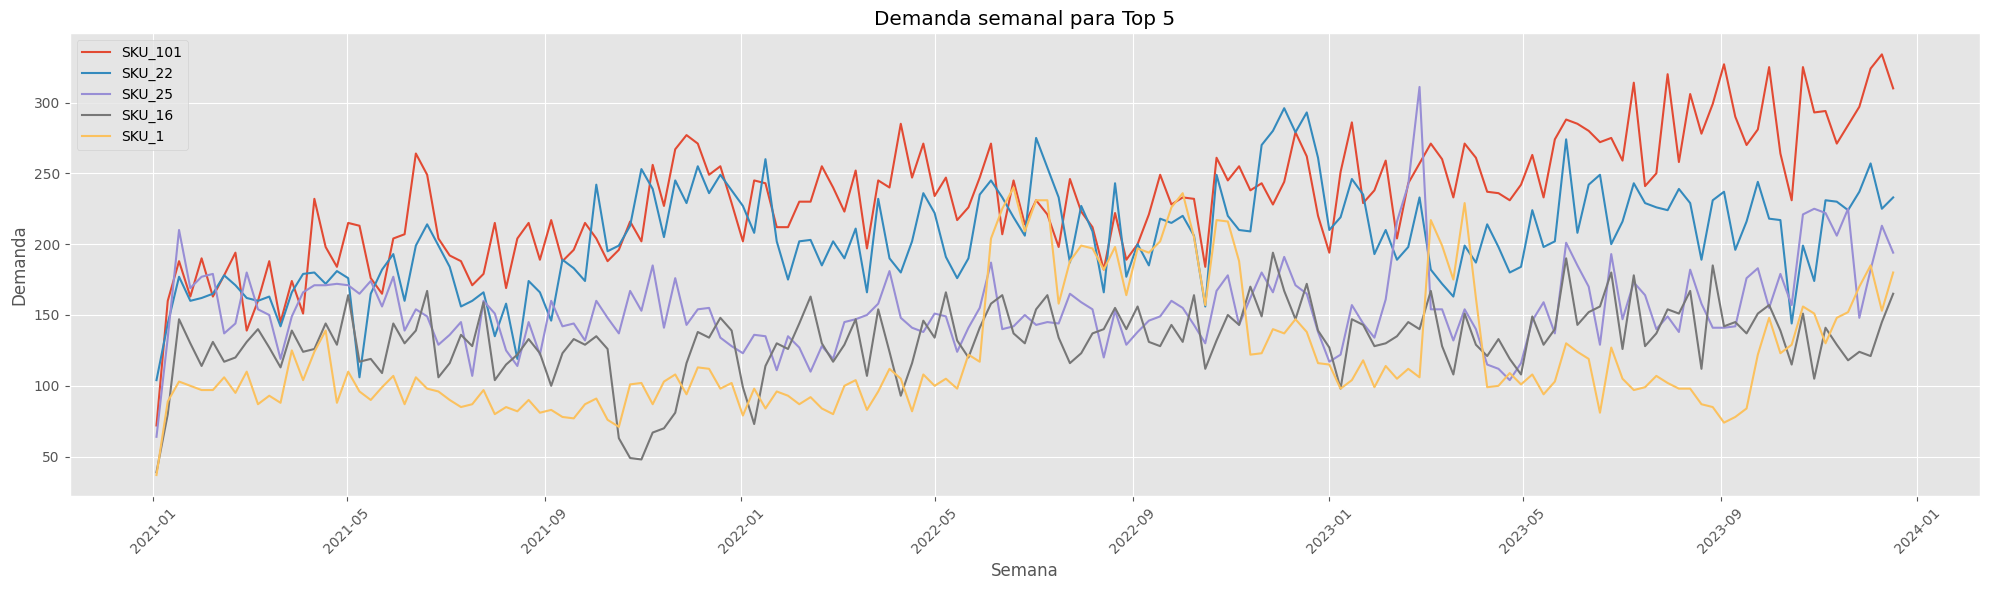

In [19]:
# Seleccionar datos de los 5 SKU de mas utilidad
top_5_sku = dem_sem.iloc[:5, 2:157]

# Seleccionar estilo ggplot
plt.style.use('ggplot')

# Crear figura y conjunto de ejes
fig, ax = plt.subplots(figsize=(20, 6))

# Iterar cada una de las 5 filas
for i in range(5):
    fila = top_5_sku.iloc[i]
    label = dem_sem.iloc[i, 1]  # Acceder al nombre de cada SKU
    ax.plot(fila.index, fila.values,  label=label)  # Convierte el indice a fecha para graficar

ax.set_title('Demanda semanal para Top 5')
ax.set_xlabel('Semana')
ax.set_ylabel('Demanda')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 6. Calcular Participación Individual y Acumulada

In [20]:
# Calcula y adiciona la participación individual de cada sku 
dem_sem['PART_IND'] = dem_sem['TOTAL_UTILIDAD']/dem_sem['TOTAL_UTILIDAD'].sum()

# Calcula la participacion acumulada 
dem_sem['PART_ACUM'] = dem_sem['PART_IND'].cumsum()

dem_sem


,COD_SKU,DESC_SKU,2021-01-03 00:00:00,2021-01-10 00:00:00,2021-01-17 00:00:00,2021-01-24 00:00:00,2021-01-31 00:00:00,2021-02-07 00:00:00,2021-02-14 00:00:00,2021-02-21 00:00:00,...,2023-12-24 00:00:00,2023-12-31 00:00:00,TOTAL_DEMANDA,COSTO_UNITARIO,UTILIDAD_UNITARIA,PRECIO,INVENTARIO_ACTUAL,TOTAL_UTILIDAD,PART_IND,PART_ACUM
75,PT-101,SKU_101,72.0,160.0,188.0,163.0,190.0,163.0,178.0,194.0,...,287.0,223.0,14134.0,7310,9690,17000,506,136958460.0,0.062372,0.062372
20,PT-022,SKU_22,104.0,144.0,177.0,160.0,162.0,165.0,178.0,171.0,...,204.0,210.0,11121.0,3840,4160,8000,650,46263360.0,0.021069,0.083441
23,PT-025,SKU_25,64.0,134.0,210.0,169.0,177.0,179.0,137.0,144.0,...,175.0,160.0,8684.0,20400,13600,34000,450,118102400.0,0.053785,0.137225
14,PT-016,SKU_16,39.0,80.0,147.0,130.0,114.0,131.0,117.0,120.0,...,112.0,110.0,7214.0,11760,16240,28000,97,117155360.0,0.053353,0.190579
0,PT-001,SKU_1,37.0,89.0,103.0,100.0,97.0,97.0,106.0,95.0,...,152.0,110.0,6456.0,11550,9450,21000,51,61009200.0,0.027784,0.218363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,PT-171,SKU_171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27880,40120,68000,53,0.0,0.000000,1.000000
119,PT-159,SKU_159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28320,19680,48000,9,0.0,0.000000,1.000000
70,PT-092,SKU_92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9360,8640,18000,8,0.0,0.000000,1.000000
117,PT-157,SKU_157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24780,17220,42000,25,0.0,0.000000,1.000000


## 7. Clasificar ABC

In [ ]:
def ABC_segmentacion(part): #función para aplicar a cada valor de participacion acumulada
   
    if part > 0 and part < 0.8:
        return 'A'
    elif part >= 0.80 and part < 0.95:
        return 'B'
    elif part >= 0.95:
        return 'C'

In [ ]:
# Aplica la funcion de ABC_segmentacion a cada porcentaje acumulado
dem_sem['CLASIF_ABC'] = dem_sem['PART_ACUM'].apply(ABC_segmentacion)

dem_sem

## 8. Resumen ABC

In [ ]:
# Cuenta el número de referencias en cada clasificación A, B o C
conteo_tipo = dem_sem['CLASIF_ABC'].value_counts().reindex(['A', 'B', 'C'])

# Suma el total de referencias
total_sku = conteo_tipo.sum()

# Calcula el porcentaje de referencias en cada clasificación
porcentaje = (conteo_tipo / total_sku)

# Aplica formato porcentaje y un decimal
porcentaje_f = ['{:.1%}'.format(pct) for pct in porcentaje]

# Crea un DataFrame con las columnas de Clasificación y Porcentaje
resumen = pd.DataFrame({'Clasificacion': conteo_tipo, 'Porcentaje': porcentaje_f})

# Aplica totales al final de la tabla
resumen.loc['Total'] = [total_sku, '{:.1%}'.format(porcentaje.sum())]

resumen

## 9. Coeficiente de Variacion

In [ ]:
# Calcula el promedio semanal del último año y redondea a 0 decimales
dem_sem['PROMEDIO_SEM'] = dem_sem[demanda_ultimo_año].mean(axis=1).round(0)

# Calcula la desviación estandard semanal del último año y redondea a 0 decimales
dem_sem['DESVEST_SEM'] = dem_sem[demanda_ultimo_año].std(axis=1).round(0)

# Calcula el coeficiente de Variación y redondea a 3 decimales
dem_sem['CV'] = (dem_sem['DESVEST_SEM']/dem_sem['PROMEDIO_SEM']).round(3)
dem_sem

### 9.1 Valores Nulos y otras funciones

- **df.isnull().sum():**
Chequea por valores faltantes o #N/A y los suma por cada columna

- **DataFrame.dropna():**
Remueve los valores faltantes del DataFrame, puede parametrizarse para filas, columnas, columnas especificas. *Ejemplo:* `df['columna'].dropna(), df.dropna(subset='columna')`

- **DataFrame.fillna(value):**
Rellena los valores faltantes con un valor especifico, por ejemplo 0. *Ejemplo:* `df['columna'].fillna(0)`

<font color='navy'><b> Ejercicio 3: 
- Encuentre cuantos NaN tiene cada columna de dem_sem
- Cree un nuevo df a partir de dem_sem y elimine las filas con NaN
- En dem_sem, reemplace los NaN de la columna 'CV' por 0


In [ ]:
# Reemplazar NaN en 'CV'


## 10. Clasificar XYZ

In [ ]:
def XYZ_segmentation(wmape):
    if wmape <= 0:
        return 'Z'
    elif wmape > 0 and wmape <= 0.5:
        return 'X'
    elif wmape > 0.5 and wmape <= 1:
        return 'Y'
    elif wmape > 1:
        return 'Z'

In [ ]:
# ApLica fucion para clasificar XYZ
dem_sem['CLASIF_XYZ'] = dem_sem['CV'].apply(XYZ_segmentation)
dem_sem

## 11. Resumen XYZ

In [ ]:
# Contar referencias en cada clasificacion
conteo_tipo = dem_sem['CLASIF_XYZ'].value_counts()

# Suma de total referencias
total_sku = dem_sem['CLASIF_XYZ'].value_counts().sum()

# Calcula el porcentaje de participacion de cada tipo de clasificacion
porcentaje_xyz = (conteo_tipo / total_sku)

# Crea nuevo data frame con resumen
resumen = pd.DataFrame({'Clasificacion': conteo_tipo, 'Porcentaje': porcentaje_xyz}).reindex(['X', 'Y', 'Z'])

# Aplica totales al final de la tabla
resumen.loc['Total'] = [total_sku, porcentaje_xyz.sum()]

# Aplica el formato % redondeado a un decimal
resumen['Porcentaje'] = ['{:.1%}'.format(pct) for pct in resumen['Porcentaje']]

resumen#.reset_index(level=0, drop=False)

## 12. Resumen Con Valor del Inventario

In [ ]:
dem_sem['VALOR_INV'] = dem_sem['INVENTARIO_ACTUAL'] * dem_sem['COSTO_UNITARIO']
dem_sem

In [ ]:
# Agrupa, suma y cuenta los codigos y el valor del inventario segun clasif_abc, clasif_xyz
df_tabla_dinamica = dem_sem.pivot_table(index=['CLASIF_ABC', 'CLASIF_XYZ'],
                                aggfunc={'COD_SKU': 'count', 'VALOR_INV': 'sum'})

# Renombra las columnas 
df_tabla_dinamica.rename(columns={'COD_SKU': 'SKU_cuenta', 'VALOR_INV': 'VALOR_INV_suma'
                                 }, inplace=True)
# Suma el total de SKU's 
total_skus = df_tabla_dinamica['SKU_cuenta'].sum()
              
# Calcula el porcentaje de cada categoria con respecto al total de SKU's
df_tabla_dinamica['SKU_porcentaje'] = df_tabla_dinamica['SKU_cuenta'] / df_tabla_dinamica['SKU_cuenta'
                                ].sum()
# Suma el porcentaje de SKU's 
total_porc_skus = df_tabla_dinamica['SKU_porcentaje'].sum()

# Calcula el porcentaje del valor del inventario
df_tabla_dinamica['VALOR_INV_porcentaje'] = df_tabla_dinamica['VALOR_INV_suma'] / df_tabla_dinamica['VALOR_INV_suma'
                                ].sum() 
              
# Suma el valor total del inventario desde df_excel
total_valor_inv_suma = dem_sem['VALOR_INV'].sum()

# Suma el total del porcentaje del valor del inventario
total_porc_valor_inv = df_tabla_dinamica['VALOR_INV_porcentaje'].sum()

#Crea un df con los totales                      
fila_total = pd.DataFrame({
    'SKU_cuenta': [total_skus],
    'SKU_porcentaje': [total_porc_skus],
    'VALOR_INV_suma': [total_valor_inv_suma],
    'VALOR_INV_porcentaje': [total_porc_valor_inv]
}, index=pd.MultiIndex.from_tuples([('Total', '')]))

# Une la tabla dinamica con el df de los totales
df_tabla_dinamica = pd.concat([df_tabla_dinamica, fila_total])
df_tabla_dinamica = df_tabla_dinamica[['SKU_cuenta', 'SKU_porcentaje','VALOR_INV_suma',  'VALOR_INV_porcentaje']]
#Aplica formato a los porcentajes y a lso valores en $
df_tabla_dinamica = df_tabla_dinamica.style.format({'VALOR_INV_suma':'${:,.0f}','SKU_porcentaje': '{:.1%}', 'VALOR_INV_porcentaje': '{:.1%}'})
df_tabla_dinamica 

In [ ]:
# Exportar a excel
dem_sem.to_excel('tabla_completa.xlsx', index =  False)